In [12]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font', **{'family': 'serif', 'serif': ['Cambria', 'Times New Roman']})

import seaborn as sns

In [2]:
pd.options.display.max_rows = 10

In [3]:
h5_dir = 'C:\\Users\\user\\Documents\\Agent-Based Models\\h5 files\\mmabmTests\\'
h5_file = 'python_mmabm_%d.h5' % 51

In [4]:
mm_table = 'signal_%d' % 3000

In [5]:
h5in = '%s%s' % (h5_dir, h5_file)

In [6]:
mmdf = pd.read_hdf(h5in, mm_table)
mmdf

,ArrStrat,ArrStratAccuracy,ArrStratAction,OIStrat,OIStratAccuracy,OIStratAction,SprStrat,SprStratAccuracy,SprStratAction,Step,arr,arrv,mid,oib,oibv,vol
0,2212222222220222,986.000000,14,222221112222222222222220,982.000000,18,NaN,NaN,NaN,20,1000000010000000,0,999393.5,000001100000000001100000,0,0.000000
1,2022222222222002,991.000000,9,220202222220222222202222,970.000000,30,21202,0.000000,5.0,21,1000000010000000,0,999393.5,000001100000000001100000,0,0.000000
2,2222020222222202,998.000000,2,220202222220222222202222,970.000000,30,22012,0.000000,0.0,22,1000000010000000,0,999393.5,000001100000000001100000,0,0.000000
3,1202222222022222,993.000000,7,220202222220222222202222,970.000000,30,02122,0.000000,2.0,23,1000000010000000,0,999393.5,000001100000000001100000,0,0.000000
4,2022222222202022,983.000000,17,220202222220222222202222,970.000000,30,22201,0.000000,2.0,24,1000000010000000,0,999393.5,000001100000000001100000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249976,2222222022222222,991.448276,9,222222222220222222202222,979.972350,20,01001,2.966110,6.0,249996,1110000011110000,3,720604.0,000001000000000011000000,-1,0.001385
249977,2222020221222222,998.171875,2,222222222220222222202222,979.972477,20,22222,1.400087,0.0,249997,1110000010000000,0,720622.0,000001000000000001100000,0,0.001181
249978,2212222212222222,993.205882,7,222222222220222222202222,979.972603,20,00211,2.966110,6.0,249998,1110000010000000,0,720642.0,000001000000000001100000,0,0.001181
249979,2212222212222222,993.202899,7,222222222220222222202222,979.972727,20,00211,2.966110,6.0,249999,1110000010000000,0,720647.5,000001000000000001100000,0,0.001219


In [7]:
mmdf.columns

Index(['ArrStrat', 'ArrStratAccuracy', 'ArrStratAction', 'OIStrat',
       'OIStratAccuracy', 'OIStratAction', 'SprStrat', 'SprStratAccuracy',
       'SprStratAction', 'Step', 'arr', 'arrv', 'mid', 'oib', 'oibv', 'vol'],
      dtype='object')

In [8]:
arrdf = mmdf.loc[:, ['ArrStrat', 'ArrStratAccuracy', 'ArrStratAction', 'arr', 'arrv']]
arrdf

,ArrStrat,ArrStratAccuracy,ArrStratAction,arr,arrv
0,2212222222220222,986.000000,14,1000000010000000,0
1,2022222222222002,991.000000,9,1000000010000000,0
2,2222020222222202,998.000000,2,1000000010000000,0
3,1202222222022222,993.000000,7,1000000010000000,0
4,2022222222202022,983.000000,17,1000000010000000,0
...,...,...,...,...,...
249976,2222222022222222,991.448276,9,1110000011110000,3
249977,2222020221222222,998.171875,2,1110000010000000,0
249978,2212222212222222,993.205882,7,1110000010000000,0
249979,2212222212222222,993.202899,7,1110000010000000,0


In [11]:
arr_len = len(arrdf.loc[100, 'arr'])
arrdf['ArrStrength'] = sum([arrdf.ArrStrat.str[x] == arrdf.arr.str[x] for x in range(arr_len)])
arrdf = arrdf.assign(AbsAcc = abs(arrdf.ArrStratAction - arrdf.arrv))
arrdf

,ArrStrat,ArrStratAccuracy,ArrStratAction,arr,arrv,ArrStrength,AbsAcc
0,2212222222220222,986.000000,14,1000000010000000,0,1,14
1,2022222222222002,991.000000,9,1000000010000000,0,3,9
2,2222020222222202,998.000000,2,1000000010000000,0,3,2
3,1202222222022222,993.000000,7,1000000010000000,0,3,7
4,2022222222202022,983.000000,17,1000000010000000,0,3,17
...,...,...,...,...,...,...,...
249976,2222222022222222,991.448276,9,1110000011110000,3,1,6
249977,2222020221222222,998.171875,2,1110000010000000,0,2,2
249978,2212222212222222,993.205882,7,1110000010000000,0,2,7
249979,2212222212222222,993.202899,7,1110000010000000,0,2,7


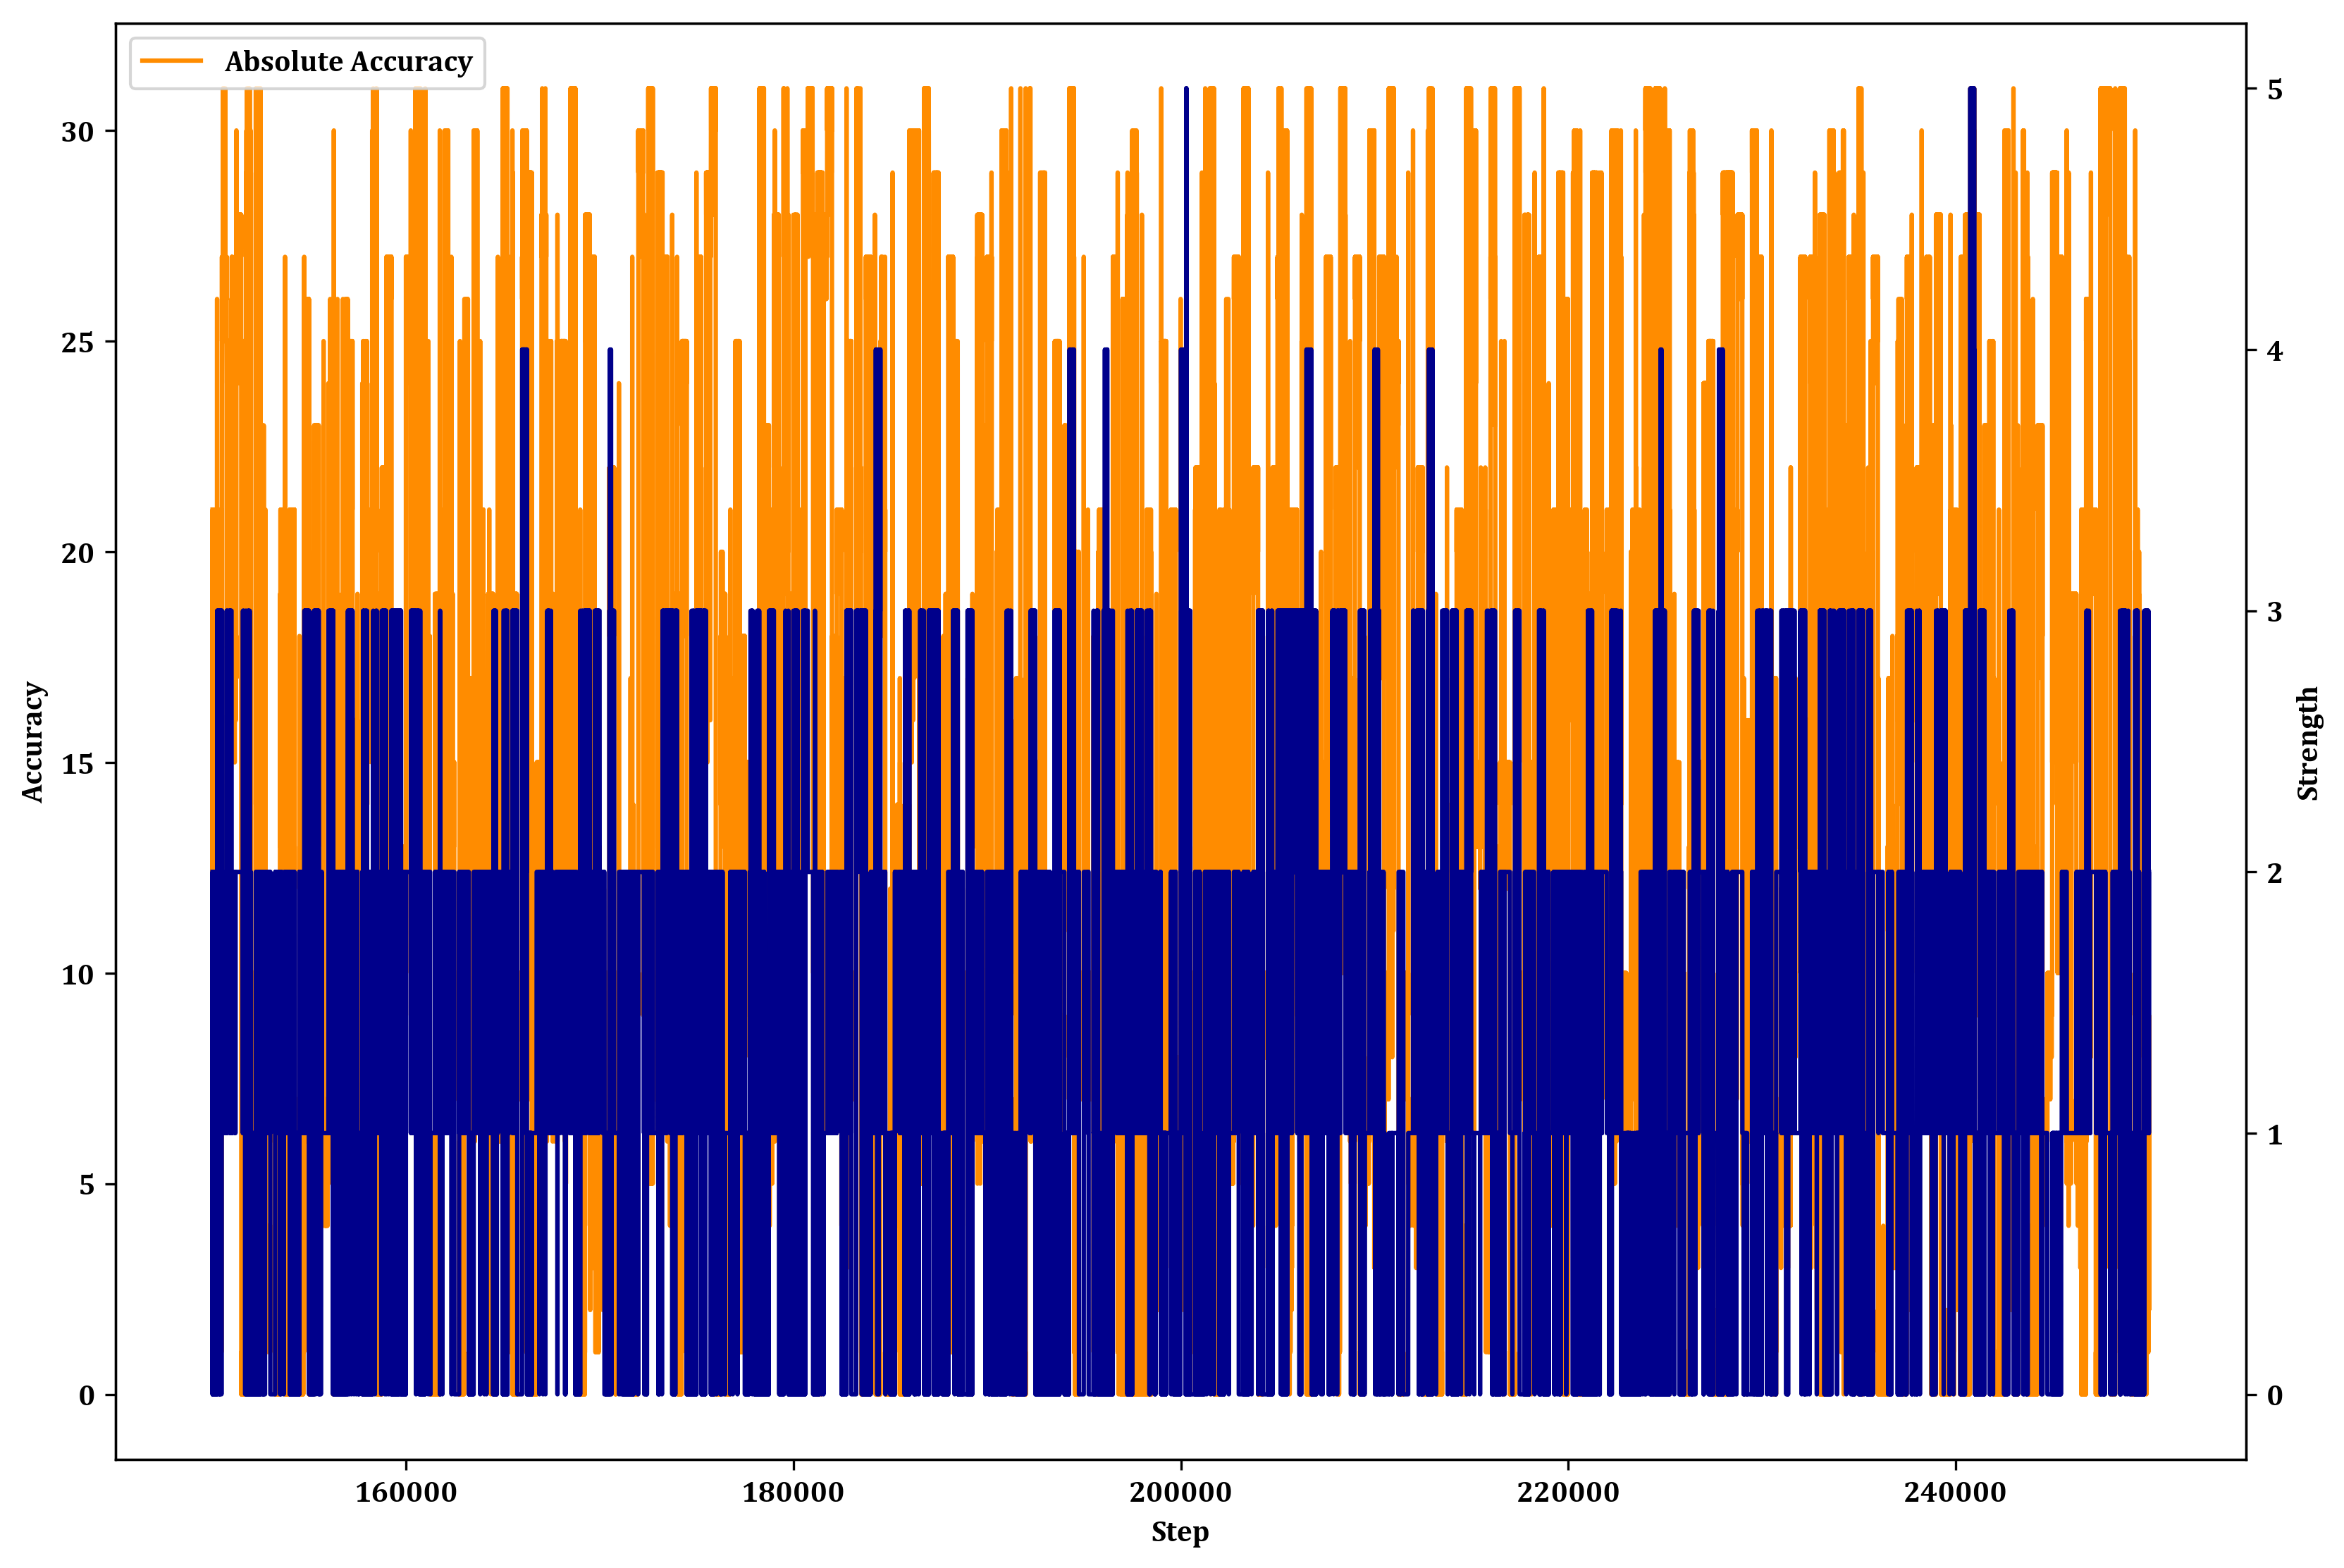

In [16]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(arrdf.loc[150000:, 'AbsAcc'], linestyle='solid', color='DarkOrange', marker='None', label='Absolute Accuracy')
ax2 = ax1.twinx() 
ax2.plot(arrdf.loc[150000:, 'ArrStrength'], linestyle='solid', color='DarkBlue', marker='None', label='Strength')
ax1.set_xlabel('Step', family='Cambria')
ax1.set_ylabel('Accuracy', family='Cambria')
ax2.set_ylabel('Strength', family='Cambria')
ax1.legend(loc='upper left')
plt.show()

In [40]:
arrdf.groupby('ArrStrat').ArrStratAccuracy.mean().describe()

count    217.000000
mean     986.360787
std        7.378751
min      970.000000
25%      982.071658
50%      986.298116
75%      991.486431
max      999.401932
Name: ArrStratAccuracy, dtype: float64

In [41]:
oibdf = mmdf.loc[:, ['OIStrat', 'OIStratAccuracy', 'OIStratAction', 'oib', 'oibv']]
oibdf

,OIStrat,OIStratAccuracy,OIStratAction,oib,oibv
0,NaN,NaN,NaN,000001100000000001100000,0
1,220202222220222222202222,970.000000,30.0,000001100000000001100000,0
2,220202222220222222202222,970.000000,30.0,000001100000000001100000,0
3,220202222220222222202222,970.000000,30.0,000001100000000001100000,0
4,220202222220222222202222,970.000000,30.0,000001100000000001100000,0
...,...,...,...,...,...
99976,222222222222222222222222,987.007273,-13.0,000001100000000011000000,-1
99977,222222222222222222222222,987.007252,-13.0,000000100000000000110000,1
99978,222222222222222222222222,987.007252,-13.0,000000100000000001100000,0
99979,222222222222222222222222,987.007252,-13.0,000000100000000001100000,0


In [43]:
oib_len = len(oibdf.loc[100, 'oib'])
oibdf['OIBStrength'] = sum([oibdf.OIStrat.str[x] == oibdf.oib.str[x] for x in range(oib_len)])
oibdf

,OIStrat,OIStratAccuracy,OIStratAction,oib,oibv,OIBStrength
0,NaN,NaN,NaN,000001100000000001100000,0,0
1,220202222220222222202222,970.000000,30.0,000001100000000001100000,0,4
2,220202222220222222202222,970.000000,30.0,000001100000000001100000,0,4
3,220202222220222222202222,970.000000,30.0,000001100000000001100000,0,4
4,220202222220222222202222,970.000000,30.0,000001100000000001100000,0,4
...,...,...,...,...,...,...
99976,222222222222222222222222,987.007273,-13.0,000001100000000011000000,-1,0
99977,222222222222222222222222,987.007252,-13.0,000000100000000000110000,1,0
99978,222222222222222222222222,987.007252,-13.0,000000100000000001100000,0,0
99979,222222222222222222222222,987.007252,-13.0,000000100000000001100000,0,0


In [44]:
oibdf.groupby('OIStrat').OIStratAccuracy.mean().describe()

count     216.000000
mean      987.745613
std         6.945074
min       968.926112
25%       983.909775
50%       987.948651
75%       992.939499
max      1000.000000
Name: OIStratAccuracy, dtype: float64

### dataclass vs dict time tests

In [1]:
from enum import Enum


class Side(Enum):
    BID = 1
    ASK = 2
    
    
class OType(Enum):
    ADD = 1
    CANCEL = 2
    MODIFY = 3

In [2]:
from dataclasses import dataclass

@dataclass
class Order:
    order_id: int
    trader_id: int
    timestamp: int
    quantity: int
    side: Side
    price: int
    otype: OType = OType.ADD


In [3]:
oid = 1
tid = 3000
time = 37
qty = 5
side = Side.BID
prc = 998
otype = OType.ADD

In [4]:
o = Order(oid, tid, time, qty, side, prc)

In [5]:
%%timeit
o.order_id

45.9 ns ± 1.96 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
o = {'order_id': oid, 'trader_id': tid, 'timestamp': time, 'type': OType.ADD, 'quantity': qty, 'side': side, 'price': prc}

In [7]:
%%timeit
o['order_id']

42.1 ns ± 0.643 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
